In [1]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 787 kB/s 
     |████████████████████████████████| 5.8 MB 40.5 MB/s 
     |████████████████████████████████| 1.3 MB 38.4 MB/s 
     |████████████████████████████████| 182 kB 27.8 MB/s 
     |████████████████████████████████| 7.6 MB 27.6 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=c407d0a2d34633225a60b59980482b3747da65419ab53b0d21580722317a4c5a
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Baseline: 0.47683143615722656 Oracle: 0.9245709776878357 Model: 0.6239943504333496
[0.47683144, 0.8388277, 0.5099648, 0.04316813, 0.42223424, 0.5404649, 0.29289433, 0.23385787, 0.43572557, 0.29204705, 0.54703957, 0.71595657, 0.2647646, 0.5147933, 0.22576031, 0.35739323, 0.44339222, 0.4758028, 0.5332048, 0.24033767, 0.49735785, 0.34790957, 0.24115959, 0.51190656]
mean:  0.41678312
STD:  0.16946776
mean:  0.7985798
STD:  0.19212228
mean:  0.45247832
STD:  0.17000726
mean:  0.44741347
STD:  0.17568322
mean:  0.38110942
STD:  0.12586647


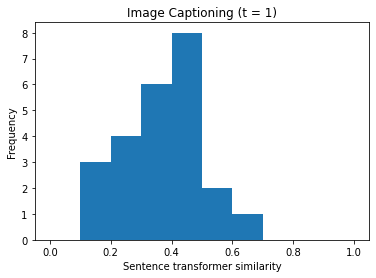

In [14]:
from sentence_transformers import SentenceTransformer 
from sklearn.metrics.pairwise import cosine_similarity
import statistics
import matplotlib.pyplot as plt
import numpy as np

model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
sentences = {"ground_truth": "steak garden salad", "baseline": "a white plate topped with meat and vegetables", "oracle": "garden salad steak", "model": "grilled steak with tomatoes and feta"}
embeddings = [model.encode(sentence) for sentence in sentences.values()]
cosine_sims = cosine_similarity(embeddings)[0][1:]
print(f"Baseline: {cosine_sims[0]} Oracle: {cosine_sims[1]} Model: {cosine_sims[2]}")

# baseline mean:  0.40683147
# oracle mean:  0.7725852
# results 0 mean:  0.4050767
# results 0.5 mean:  0.39784238
# results 1 mean:  0.3107761

def map_txt_file(filename):
  with open(filename) as fp:
    blines = fp.readlines()
  original_against_new = {}
  for line in blines:
    both = line.split(",")
    original_against_new[both[0]] = both[1][1:-1]
  return original_against_new

baseline = map_txt_file("baseline.txt")
oracle = map_txt_file("oracle.txt")
results0 = map_txt_file("results_0.txt")
results05 = map_txt_file("results_0.5.txt")
results1 = map_txt_file("results_1.txt")

'''
baseline = {"tofu stew with kimchi": "a bowl filled with meat and vegetables on top of a wooden table",
            "custard toast with berries": "a knife and a slice of pizza on a cutting board",
            "steak and potatoes": "a pan filled with meat and vegetables on top of a stove" 
            }

oracle = {"tofu stew with kimchi": "kimchi stew with soft tofu",
            "custard toast with berries": "french toast with condensed milk and berries",
            "steak and potatoes": "steak and potatoes" 
            }

results05 = {"tofu stew with kimchi": "easy chicken wings",
            "custard toast with berries": "homemade cranberry pumpkin pie",
            "steak and potatoes": "easy pork chops" 
            }

results0 = {"tofu stew with kimchi": "chicken soup with lemon and lemon",
            "custard toast with berries": "chocolate chip cookies",
            "steak and potatoes": "grilled pork chops with roasted potatoes" 
            }

results1 = {"tofu stew with kimchi": "mushroom chicken how to make angel",
            "custard toast with berries": "waffles veggie caramel sauce",
            "steak and potatoes": "mushrooms young with tomato and sausage" 
            }
            '''

maps = [baseline, oracle, results0, results05, results1]

similarities = []
for truth in baseline.keys():
  dishnames = [mapper[truth] for mapper in maps]
  dishnames.insert(0, truth)
  embeddings = [model.encode(sentence) for sentence in dishnames]
  cosine_sims = cosine_similarity(embeddings)[0][1:]
  #print(truth, cosine_sims)
  similarities.append(cosine_sims)

#print(similarities) 

baselines = [similarity[0] for similarity in similarities]
print(baselines)
oracles = [similarity[1] for similarity in similarities]
result0s = [similarity[2] for similarity in similarities]
result05s = [similarity[3] for similarity in similarities]
result1s = [similarity[4] for similarity in similarities]

results = [baselines, oracles, result0s, result05s, result1s]

for i, result in enumerate(results):
    print("mean: ", statistics.mean(result))
    print("STD: ", np.std(np.array(result)))





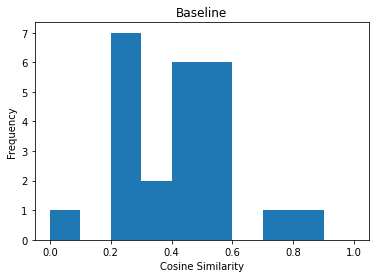

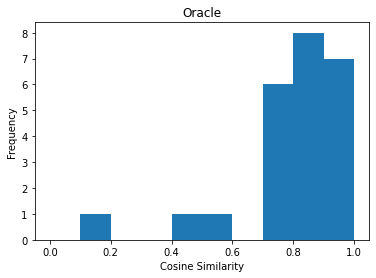

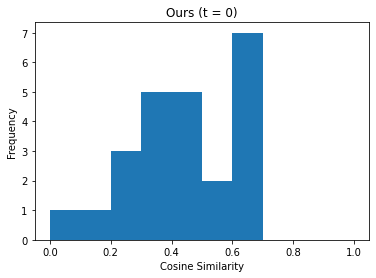

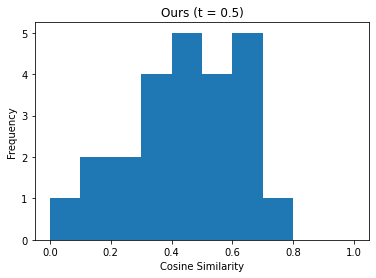

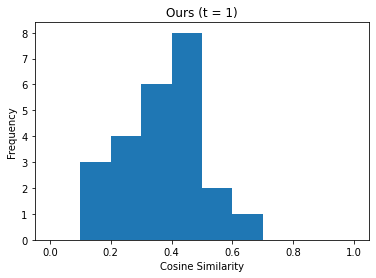

In [18]:
plt.hist(baselines, 10, (0, 1))
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.title("Baseline")
plt.show()
plt.hist(oracles, 10, (0, 1))
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.title("Oracle")
plt.show()
plt.hist(result0s, 10, (0, 1))
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.title("Ours (t = 0)")
plt.show()
plt.hist(result05s, 10, (0, 1))
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.title("Ours (t = 0.5)")
plt.show()
plt.hist(result1s, 10, (0, 1))
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.title("Ours (t = 1)")
plt.show()

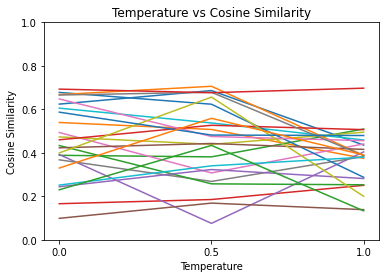

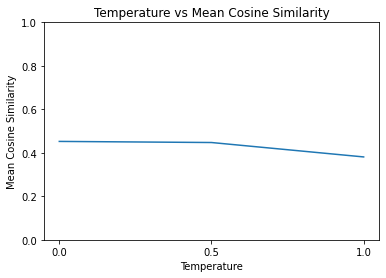

In [19]:
for example in range(len(baselines)):
  x_axis = [0, 0.5, 1]
  y_axis = [result0s[example], result05s[example], result1s[example]]
  plt.plot(x_axis, y_axis)
plt.title('Temperature vs Cosine Similarity')
plt.xlabel('Temperature')
plt.ylabel('Cosine Similarity')
plt.xticks([0, 0.5, 1])
plt.ylim([0, 1])
plt.show()

y_axis = [statistics.mean(result) for result in [result0s, result05s, result1s]]
plt.plot(x_axis, y_axis)
plt.title('Temperature vs Mean Cosine Similarity')
plt.xlabel('Temperature')
plt.ylabel('Mean Cosine Similarity')
plt.xticks([0, 0.5, 1])
plt.ylim([0, 1])
plt.show()

